#  Modeling and feature importance visual

## Feature Selection

In this section, I will select specific features for model training. The original dataset contains 265 features, most of which are categorical attributes, dominantly the list of drug names that are approved as pain medications that need special AED licensed prescriber.Here,my main target is to predict the overdoses using the  the list of prescriber specialists with NPI information and the FDA approved drug lists. The data set has only total opiod cliams and total claim counts and i took the standard prescription for opiod drugs is 84 days which is 12 weeks. Therefore, an additional feature was created in the data cleaning, pre processing that shows avg_op_supply which i limit to the standard to be 84 and any ones who prescribes the category of medications under the controlled substance act(CSA). The CSA is used for organizing drugs based on the risk of abuse or harm to users in five and my capestone focuses on the approved by [FDA](https://www.fda.gov/drugs/drugsafety/informationbydrugclass/ucm251735.htm) and [DEA](https://www.deadiversion.usdoj.gov/schedules/) to be prescribed by licensed and certified health professional.  These drug lists that are considered controlled substances under the Controlled Substances Act (CSA) are divided into five schedules.  An updated and complete list of the schedules is published annually in [Title 21 Code of Federal Regulations (C.F.R.) §§ 1308.11 through 1308.15](https://www.deadiversion.usdoj.gov/21cfr/cfr/2108cfrt.htm).

Therfore, for analysis and visualization  i only took those physicians who have greater opood cliams from the center for medical services dataset and created a feature average opiod supply  by dividing the total cliam by the opiod cliam and reviewed those specialists who prescribe more than the set limit of 12 weeks and that also become a new feature that measures the length of opiod prescription supply more than 84 days. As been visualized in notebook 1.3, significant amount of prescribers are family physicians, followed by internal medicine,nurse practitioners, Physicain Assistant and physical medicine and rehabilitation. When i group based on speciality and the vsuals can be accessed   [here top 20](https://plot.ly/~kiros/112) and the lists are as follows:-
  > $'Cardiology', 'Nephrology', 'Endocrinology', 'Neurology'  'General Practice', 'Internal Medicine', 'Urology'$,   > $'Pulmonary Disease', 'Gastroenterology', 'Family Practice', 'Infectious Disease','Psychiatry'$ 
  >$'Nurse Practitioner', 'Ophthalmology','Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology'$ , $'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology'$

In [1]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

rcParams.update({'figure.autolayout':True})
np.random.seed(2018)

# Configure visual settings:
plt.style.use('fivethirtyeight')
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
## Read Data
df=pd.read_csv('./inputs/cleaned_prescriber_info18.csv')
df.head()[:2]

C:\ProgramData\Anaconda33\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [3]:
print(df.shape)

(25000, 264)


We have a high dimensional data set again. How can we create an effective predictive model quickily on such a complicated data-set?



### Data Proprecessing

Even a quick and dirty classification model requires the transformation of non-numeric feature, in order to enable Python to identify the variable. My method was so 'dirty' that I even included misleading variables in my model. Now I will modify my Kernel to a more completed, accurate one.

In [4]:
opioids=pd.read_csv('./inputs/list_opioids.csv')

In [5]:
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [6]:
df=df[Kept_variable]
print(df.shape)

(25000, 253)


In [7]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [8]:
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(',', '')
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(' ', '')
df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].astype(float)

In [9]:
df.isnull().sum()

NPI                                  0
Gender                               0
State                                0
Credentials                         82
Specialty                            0
NPPES Provider Last Name          2610
NPPES Provider First Name         2610
NPPES Provider ZIP Code           2610
NPPES Provider State                 0
Totalclaimcount                      0
OpioidClaimCount                     0
ACYCLOVIR                            0
ADVAIR.DISKUS                        0
AGGRENOX                             0
ALENDRONATE.SODIUM                   0
ALLOPURINOL                          0
ALPRAZOLAM                           0
AMIODARONE.HCL                       0
AMITRIPTYLINE.HCL                    0
AMLODIPINE.BESYLATE                  0
AMLODIPINE.BESYLATE.BENAZEPRIL       0
AMOXICILLIN                          0
AMOX.TR.POTASSIUM.CLAVULANATE        0
AMPHETAMINE.SALT.COMBO               0
ATENOLOL                             0
ATORVASTATIN.CALCIUM     

In [10]:
df.fillna(0,inplace = True)

In [11]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=253)

In [12]:
df.drop(['NPPES Provider Last Name', 'NPPES Provider First Name','NPPES Provider ZIP Code',
         'NPPES Provider State'], axis =1, inplace = True)

In [13]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [14]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
print(train.shape)
print(test.shape)

(17500, 249)
(7500, 249)


In [15]:
Categorical_columns=['Gender','State','Credentials','Specialty']
for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

y = train['Opioid_Prescriber']

X = train.iloc[:,1:245]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
train.iloc[:,1:245][:2]

,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
4913,0,18,517,48,153,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9338,0,6,284,25,229,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0


In [18]:
X =train.iloc[:,1:245]
y = train['Opioid_Prescriber']

In [19]:
print("====================================Models,5Fold CV and Test Scores==========================================")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regrssion: ")
print("Five cross-val score means: {}".format(cross_val_score(lr_model, X_train, y_train, cv = 5).mean()))
print("Test score:", lr_model.score(X_test, y_test))
print("-----------------------------------------------------------------------------------------------------------------")

knn_reg = KNeighborsRegressor()
knn_reg_params = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}
gs_knn_reg = GridSearchCV(knn_reg, knn_reg_params)
gs_knn_reg.fit(X_train, y_train)

print("k-nearest:")
print("Five cross-val score means: {}".format(cross_val_score(gs_knn_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_knn_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

tree_reg = DecisionTreeRegressor()
tree_reg_params = {
#     'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}
gs_tree_reg = GridSearchCV(tree_reg, tree_reg_params)
gs_tree_reg.fit(X_train, y_train)

print("Decision Tree Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_tree_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_tree_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

bag_reg = BaggingRegressor()
bag_reg_params = {}

gs_bag_reg = GridSearchCV(bag_reg, bag_reg_params)
gs_bag_reg.fit(X_train, y_train)

print("Bagging Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_bag_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_bag_reg.score(X_test, y_test))
print("-----------------------------------------------------------------------------------------------------------")

rf_reg = RandomForestRegressor()
rf_reg_params = {}

gs_rf_reg = GridSearchCV(rf_reg, rf_reg_params)
gs_rf_reg.fit(X_train, y_train)

print("Random Forest Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_rf_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_rf_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

ada_reg = AdaBoostRegressor()
ada_reg_params = {}

gs_ada_reg = GridSearchCV(ada_reg, ada_reg_params)
gs_ada_reg.fit(X_train, y_train)

print("AdaBoost Regressor:")
print("Five cross-val score means: {}".format(cross_val_score(gs_ada_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_ada_reg.score(X_test, y_test))
print("----------------------------------------------------------------------------------------------------------")

svr = SVR()
svr_params = {
    'C':[.1,1,.1]
}

gs_svr = GridSearchCV(svr, svr_params)
gs_svr.fit(X_train, y_train)

print("Support Vector Regressor:")
print("five cross-val score means: {}".format(cross_val_score(gs_svr, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_svr.score(X_test, y_test))
print("----------------------------------------------------------------------------------------------------------------")

====================================Models,5Fold CV and Test Scores==========================================
Linear Regrssion: 
Five cross-val score means: 0.5588333162759325
Test score: 0.5913652537140697
-----------------------------------------------------------------------------------------------------------------
k-nearest:
Five cross-val score means: 0.5671962663791562
Test score: 0.5269664604001213
------------------------------------------------------------------------------------------------------------
Decision Tree Regressor: 
Five cross-val score means: 0.02158379846227975
Test score: 0.3185779003291218
------------------------------------------------------------------------------------------------------------
Bagging Regressor: 
Five cross-val score means: 0.5475622646936321
Test score: 0.6222648709399
-----------------------------------------------------------------------------------------------------------
Random Forest Regressor: 
Five cross-val score means: 0.56176905

In [20]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [21]:
print("=============================================<Root-Mean-Square Error>============================================")
from sklearn.metrics import mean_squared_error
import numpy as np
print("RMSE scores")
print("\n")
print("LR:\n-----------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(lr_model.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(lr_model.predict(X_test), y_test)))

print("\n")
print("KNN:\n--------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_knn_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_knn_reg.predict(X_test), y_test)))

print("\n")
print("Tree:\n------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_tree_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_tree_reg.predict(X_test), y_test)))

print("\n")
print("Bag:\n----------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_bag_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_bag_reg.predict(X_test), y_test)))

print("\n")
print("Random Forest:\n------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_rf_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_rf_reg.predict(X_test), y_test)))

print("\n")
print("AdaBoost:\n---------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_ada_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_ada_reg.predict(X_test), y_test)))

print("\n")
print("SVR:\n--------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_svr.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_svr.predict(X_test), y_test)))

=============================================<Root-Mean-Square Error>============================================
RMSE scores


LR:
-----------------------------------------------------------------------------------------------------------
Train score: 5.196921296239649
Test score: 7.115028225059414


KNN:
--------------------------------------------------------------------------------------------------------
Train score: 6.440482734791147
Test score: 7.65517192118225


Tree:
------------------------------------------------------------------------------------------------------
Train score: 0.0
Test score: 9.187917531814735


Bag:
----------------------------------------------------------------------------------------------------------
Train score: 3.055023279468626
Test score: 6.840733461092772


Random Forest:
------------------------------------------------------------------------------------------
Train score: 3.107677497516663
Test score: 7.479546815912617


AdaBoost:
-------------

In [22]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty', 'Totalclaimcount',
       'OpioidClaimCount', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=249)

#### 3. Model Building step 2_Rework with tunning

In [24]:
ineligible_noOpioidsPrescriber = (df['Opioid_Prescriber'] == 0) & (df['op_longer'] == 0)
ineligible_yesOpioid_Prescriber = (df['Opioid_Prescriber'] == 0) & (df['op_longer'] == 1)
eligible_noOpioid_Prescriber = (df['Opioid_Prescriber'] == 1) & (df['op_longer'] == 0)
eligible_yesOpioid_Prescriber = (df['Opioid_Prescriber'] == 1) & (df['op_longer'] == 1)
print(
"Ineligible and not Opioid_Prescriber:\t\t", df[ineligible_noOpioidsPrescriber].shape[0],
"\nIneligible and has a Opioid_Prescriber:\t", df[ineligible_yesOpioid_Prescriber].shape[0],
"\nEligible and noOpioid_Prescriber:\t\t", df[eligible_noOpioid_Prescriber].shape[0],
"\nEligible and has prescribed opiods:\t", df[eligible_yesOpioid_Prescriber].shape[0])

Ineligible and not Opioid_Prescriber:		 11123 
Ineligible and has a Opioid_Prescriber:	 0 
Eligible and noOpioid_Prescriber:		 4 
Eligible and has prescribed opiods:	 13331


In [25]:
import re
from sklearn import svm
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation,metrics
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

In [27]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [28]:
# df.drop(columns=[''], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [29]:
df.columns

Index(['NPI', 'State', 'Credentials', 'Specialty', 'Totalclaimcount',
       'OpioidClaimCount', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       'ALENDRONATE.SODIUM',
       ...
       'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber', 'Gender_M'],
      dtype='object', length=249)

In [30]:
df.shape

(25000, 249)

In [34]:
# Ustandardization and applying all models at once
ss  = StandardScaler()

logreg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=14, random_state=42)
adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [35]:
# making pipeline for choosing best model
pipe_logreg = Pipeline([
    ('ss', ss),
    ('logreg', logreg)
])
pipe_rfc = Pipeline([
    ('ss', ss),
    ('rfc', rfc),
])
pipe_adb = Pipeline([
    ('ss', ss),
    ('adb', adb)
])

In [38]:
%%time
pipes    = [ 
    pipe_logreg, 
    pipe_rfc, 
    pipe_adb,
]
pipe_idx = {0: 'Logistic Regression', 
            1: 'Random Forest', 
            2: 'Adaboost'
           }

for idx, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    print('\nScore Train/Test: %s' % pipe_idx[idx])
    print(pipe.score(X_train, y_train))
    print(pipe.score(X_test, y_test))
# print('Best params: %s' % pipe.best_params_)


Score Train/Test: Logistic Regression
0.8729904761904762
0.8461714285714286

Score Train/Test: Random Forest
0.9954285714285714
0.8731428571428571

Score Train/Test: Adaboost
0.44739047619047617
0.4342857142857143
Wall time: 2min 21s


In [47]:
## Read Data
df=pd.read_csv('./inputs/cleaned_prescriber_info18.csv')
df.head()[:2]

C:\ProgramData\Anaconda33\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [48]:
print(df.shape)

(25000, 264)


In [49]:
opioids=pd.read_csv('./inputs/list_opioids.csv')

In [50]:
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [51]:
df=df[Kept_variable]
print(df.shape)

(25000, 253)


In [52]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [53]:
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(',', '')
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(' ', '')
df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].astype(float)

In [54]:
df.isnull().sum()

NPI                                  0
Gender                               0
State                                0
Credentials                         82
Specialty                            0
NPPES Provider Last Name          2610
NPPES Provider First Name         2610
NPPES Provider ZIP Code           2610
NPPES Provider State                 0
Totalclaimcount                      0
OpioidClaimCount                     0
ACYCLOVIR                            0
ADVAIR.DISKUS                        0
AGGRENOX                             0
ALENDRONATE.SODIUM                   0
ALLOPURINOL                          0
ALPRAZOLAM                           0
AMIODARONE.HCL                       0
AMITRIPTYLINE.HCL                    0
AMLODIPINE.BESYLATE                  0
AMLODIPINE.BESYLATE.BENAZEPRIL       0
AMOXICILLIN                          0
AMOX.TR.POTASSIUM.CLAVULANATE        0
AMPHETAMINE.SALT.COMBO               0
ATENOLOL                             0
ATORVASTATIN.CALCIUM     

In [55]:
df.fillna(0,inplace = True)

In [56]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=253)

In [57]:
df.drop(['NPPES Provider Last Name', 'NPPES Provider First Name','NPPES Provider ZIP Code',
         'NPPES Provider State'], axis =1, inplace = True)

In [58]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [59]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [ ]:
def get_me_dummies(dsi):
category_t_keep = ['gender', 'state', 'specialty'] results = {}
for category in category_t_keep:
names = dsi[category].unique()
dummies = [category + '_' + s for s in names] results[category] = dummies
return results['gender'] + results['state'] + results['specialty']

In [60]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
print(train.shape)
print(test.shape)

(17500, 249)
(7500, 249)


In [61]:
Categorical_columns=['Gender','State','Credentials','Specialty']
for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
y = train['Opioid_Prescriber']

X = train.iloc[:,1:245]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
train.iloc[:,1:245][:2]

,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
4913,0,18,517,48,153,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9338,0,6,284,25,229,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0


In [64]:
X =train.iloc[:,1:245]
y = train['Opioid_Prescriber']

In [65]:
rfc=RandomForestClassifier()

In [66]:
hyperparameters={
                'n_estimators': [100],
                'max_depth': [30],
                'min_samples_split': [30],
                'class_weight': ['balanced']
}
                
rfgrid = GridSearchCV(rfc, hyperparameters, cv=3, scoring='roc_auc')

In [ ]:
# df[columns] = df.columns.apply(lambda x: float(x.split()[0].replace(',', '')))
# df[columns] = df.columns.apply(lambda x: float(x.split()[0].replace(',', '')))

In [ ]:
# #making sure index is in order
# df = df.sort_values(by=['Id'])

In [ ]:
target = df.Opioid_Prescriber
features = df.drop(columns=['Opioid_Prescriber', "op_longer",'op_prescriber','avg_op_supply'])

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install msgpack

In [ ]:
!pip install distributed

In [ ]:
!pip install xgboost

In [ ]:
!conda install -c https://conda.anaconda.org/akode xgboost

In [74]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [75]:
from sklearn.preprocessing import scale
X_test = scale(X_test)

In [76]:
df1 = df[df['Opioid_Prescriber'] == 0]
df2 = df[df['Opioid_Prescriber'] == 1]

In [77]:
print ('total', len(df))
print ('Non opiod', len(df1))
print ('opiod', len(df2))

total 25000
Non opiod 11123
opiod 13335


In [ ]:
def bootstrap_sample(sample, n=100, replicate = False, size=100):
    ''' Generates bootstrap samples and bootstrap replicates. 
    Bootstrap sample size defaults to 100. 
    Returns bootstrap samples unless replicate function supplied.'''
        
    bootstraps = [list(np.random.choice(sample, size = size)) for i in range(n)]
    
    if replicate == False:
        return(bootstraps)
    else:
        return(list(map(replicate, bootstraps)))

##### Repeating the above process after checking the existance of Data gap

In [78]:
y = df.Opioid_Prescriber
X = df.drop(['Opioid_Prescriber', "op_longer",'op_prescriber','avg_op_supply'], axis =1)

In [80]:
# Verifying shapes are the same 

X_train.shape

(13125, 244)

In [81]:
# Verifying shapes are the same 


y_train.shape

(13125,)

In [82]:
# Verifying shapes are the same 

X_test.shape

(4375, 244)

In [83]:
# Verifying shapes are the same 

y_test.shape

(4375,)

In [87]:
!pip install tpot

  Using cached https://files.pythonhosted.org/packages/17/c9/ab11855af164d03be0ff4fddd4c46a5bd44799a9ecc1770e01a669c21168/update_checker-0.16-py2.py3-none-any.whl
  Running setup.py bdist_wheel for tpot: started
  Running setup.py bdist_wheel for tpot: finished with status 'done'
  Stored in directory: C:\Users\kiraz\AppData\Local\pip\Cache\wheels\00\f3\4d\8d28f69c59669ba720eebaa4ebc8a3b28da2a61662367b38e8
  Running setup.py bdist_wheel for deap: started
  Running setup.py bdist_wheel for deap: finished with status 'done'
  Stored in directory: C:\Users\kiraz\AppData\Local\pip\Cache\wheels\22\ea\bf\dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Running setup.py bdist_wheel for stopit: started
  Running setup.py bdist_wheel for stopit: finished with status 'done'
  Stored in directory: C:\Users\kiraz\AppData\Local\pip\Cache\wheels\3c\85\2b\2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot deap stopit


distributed 1.21.8 requires msgpack, which is not installed.


In [88]:

# TPOT used to optimize and model pipelines# TPOT u 

from tpot import TPOTClassifier

C:\ProgramData\Anaconda33\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\ProgramData\Anaconda33\lib\importlib\_bootstrap_external.py:426: ImportWarning: Not importing directory C:\ProgramData\Anaconda33\lib\site-packages\mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
C:\ProgramData\Anaconda33\lib\importlib\_bootstrap_external.py:426: ImportWarning: Not importing directory c:\programdata\anaconda33\lib\site-packages\mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [89]:
pipeline_optimizer = TPOTClassifier(generations=2, population_size=20,cv=5, verbosity=2,
                      config_dict='TPOT light')

C:\ProgramData\Anaconda33\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [90]:
pipeline_optimizer.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.8700846686836219


Generation 2 - Current best internal CV score: 0.8702285343683833



Best pipeline: DecisionTreeClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=4, min_samples_leaf=16, min_samples_split=19)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=2, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=20, periodic_checkpoint_folder=None,
        population_size=20, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [91]:
print(pipeline_optimizer.score(X_test, y_test))

0.8633142857142857


In [93]:
# Machine learning library/functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

In [94]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [95]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
dt.score(X_train,y_train)

0.8835809523809524

In [97]:
dt.score(X_test,y_test)

0.8585142857142857

In [98]:
cross_val_score(dt, X, y,scoring='accuracy',cv=5).mean()

C:\ProgramData\Anaconda33\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.8618660859609195

In [ ]:
important_features

In [102]:
rf = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [104]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
rf.score(X_train,y_train)

0.8730666666666667

In [106]:
rf.score(X_test,y_test)

0.8386285714285714

In [108]:
cross_val_score(rf, X, y,scoring='accuracy',cv=5).mean()

C:\ProgramData\Anaconda33\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.864993981430213

In [109]:
important_features = pd.Series(data=rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [ ]:
explanation=pd.DataFrame({'features':features, 'importance':importance})

In [110]:
important_features

OpioidClaimCount                 0.317451
LEVOTHYROXINE.SODIUM             0.075466
Totalclaimcount                  0.063568
WARFARIN.SODIUM                  0.036520
AZITHROMYCIN                     0.034418
METFORMIN.HCL                    0.027922
MELOXICAM                        0.026876
POTASSIUM.CHLORIDE               0.025078
SIMVASTATIN                      0.022521
LATANOPROST                      0.021165
PROAIR.HFA                       0.021024
CIPROFLOXACIN.HCL                0.020841
PREDNISONE                       0.019741
RANITIDINE.HCL                   0.017100
LISINOPRIL                       0.015476
Specialty                        0.015435
OMEPRAZOLE                       0.013755
TAMSULOSIN.HCL                   0.012033
RESTASIS                         0.008964
SULFAMETHOXAZOLE.TRIMETHOPRIM    0.008697
NAPROXEN                         0.007941
FLUTICASONE.PROPIONATE           0.007820
HYDROCORTISONE                   0.007767
METOPROLOL.TARTRATE              0

In [132]:
# pd.DataFrame(important_features).plot(kind = 'barh', grid=True)

In [133]:
# pd.DataFrame(important_features).plot(kind = 'barh', grid=False)

In [121]:
# Importing more packages for model evaluation

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.svm import LinearSVC

In [122]:
y_pred = rf.predict(X_test)

In [123]:
# Function to allow us to obtain aucroc score for a multi-class y variable

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    return roc_auc_score(y_test, y_pred, average=average)

In [124]:
multiclass_roc_auc_score(y_test,y_pred)

0.5120118679963719

In [125]:
metrics.precision_score(y_test, y_pred,average='micro')

0.8386285714285714

In [126]:
metrics.recall_score(y_test, y_pred, average='macro')

0.029201309481382984

In [127]:
# Function to produce confusion matrix, precision, recall and f1-score# Functio 

def classifications(y_test, y_pred):
    print('Mean accuracy score %s ' % metrics.accuracy_score(y_test, y_pred), '\n')
    print(confusion_matrix(y_test, y_pred), '\n')
    print(classification_report(y_test, y_pred))

In [128]:
classifications(y_test,y_pred)

Mean accuracy score 0.8386285714285714  

[[1681  196    0 ...    0    0    0]
 [ 415 1988    0 ...    0    0    0]
 [   4    0    0 ...    0    0    0]
 ...
 [   0    1    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]] 



C:\ProgramData\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.77      0.90      0.83      1877
          1       0.90      0.83      0.86      2403
         12       0.00      0.00      0.00         4
         13       0.00      0.00      0.00         7
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         3
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00         4
         18       0.00      0.00      0.00         4
         20       0.00      0.00      0.00         4
         22       0.00      0.00      0.00         3
         23       0.00      0.00      0.00         1
         24       0.00      0.00      0.00         2
         25       0.00      0.00      0.00         2
         26       0.00      0.00      0.00         1
         27       0.00      0.00      0.00         1
         28       0.00      0.00      0.00         2
         29       0.00      0.00      0.00   

In [129]:
cm = confusion_matrix(y_test,y_pred)

In [130]:
cm

array([[1681,  196,    0, ...,    0,    0,    0],
       [ 415, 1988,    0, ...,    0,    0,    0],
       [   4,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]], dtype=int64)

##### Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_c = DecisionTreeClassifier(max_depth=5)


params = {
    'max_depth':[1, 2, 3, 5, 7, 10],
    'max_features':[1, 2,  3, 5]
}


gs_dt = GridSearchCV(estimator = dt_c, param_grid = params)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)

C:\ProgramData\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7611428571428571
{'max_depth': 10, 'max_features': 5}


In [135]:
dt_c.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

##### Random Forest Classifier

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()


params = {
    'n_estimators': [3,5,7,10], 
    'max_features': [3, 5, 7],
    'max_depth': [1, 2 , 3, 4]
}
gs_rf = GridSearchCV(rf_c, param_grid=params)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

C:\ProgramData\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7929904761904762
{'max_depth': 4, 'max_features': 5, 'n_estimators': 10}


In [138]:
rf_c.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

##### AdaBoost

In [139]:
from sklearn.ensemble import AdaBoostClassifier
ada_r = AdaBoostClassifier()

params = {
    'n_estimators':range(1,7)
}
gs_ada = GridSearchCV(ada_r, param_grid = params)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)

C:\ProgramData\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.8547809523809524
{'n_estimators': 1}


In [140]:
gs_ada.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__base_estimator', 'estimator__learning_rate', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [143]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/68/12/4cabc5c01451eb3b413d19ea151f36e33026fc0efb932bf51bcaf54acbf5/Keras-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e2/60/c557075e586e968d7a9c314aa38c236b37cb3ee6b37e8d57152b1a5e0b47/Keras_Applications-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/33/275506afe1d96b221f66f95adba94d1b73f6b6087cfb6132a5655b6fe338/Keras_Preprocessing-1.0.1-py2.py3-none-any.whl


distributed 1.21.8 requires msgpack, which is not installed.


In [146]:
!pip install tensorflow

distributed 1.21.8 requires msgpack, which is not installed.


##### CNN

In [147]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\ProgramData\Anaconda33\lib\importlib\_bootstrap_external.py:426: ImportWarning: Not importing directory C:\ProgramData\Anaconda33\lib\site-packages\google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [148]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [149]:
from keras import regularizers
import numpy as np
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

np.random.seed(42)

model= Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 1

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['acc'])

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0) 


history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                      epochs=30, batch_size=None)
                     # callbacks=[early_stop])

Train on 13125 samples, validate on 4375 samples
Epoch 1/30
13125/13125 [==============================] - ETA: 2:58 - loss: 0.7999 - acc: 0.468 - ETA: 8s - loss: -3.2125 - acc: 0.542 - ETA: 3s - loss: -4.8137 - acc: 0.53 - ETA: 2s - loss: -5.4196 - acc: 0.54 - ETA: 1s - loss: -5.5248 - acc: 0.54 - ETA: 1s - loss: -7.8988 - acc: 0.54 - ETA: 1s - loss: -8.1043 - acc: 0.54 - ETA: 0s - loss: -10.2299 - acc: 0.552 - ETA: 0s - loss: -11.3652 - acc: 0.556 - ETA: 0s - loss: -11.8105 - acc: 0.560 - ETA: 0s - loss: -11.5419 - acc: 0.569 - ETA: 0s - loss: -11.9297 - acc: 0.577 - ETA: 0s - loss: -12.0448 - acc: 0.582 - ETA: 0s - loss: -13.0548 - acc: 0.584 - ETA: 0s - loss: -13.8903 - acc: 0.585 - ETA: 0s - loss: -14.0544 - acc: 0.588 - 1s 103us/step - loss: -13.8995 - acc: 0.5925 - val_loss: -18.0190 - val_acc: 0.6811
Epoch 2/30
13125/13125 [==============================] - ETA: 2s - loss: -27.9663 - acc: 0.687 - ETA: 0s - loss: -31.2234 - acc: 0.668 - ETA: 0s - loss: -24.1047 - acc: 0.691 - ET

Epoch 11/30
13125/13125 [==============================] - ETA: 1s - loss: 0.2688 - acc: 0.843 - ETA: 0s - loss: -13.0944 - acc: 0.821 - ETA: 0s - loss: -11.8766 - acc: 0.821 - ETA: 0s - loss: -12.9436 - acc: 0.814 - ETA: 0s - loss: -13.1221 - acc: 0.815 - ETA: 0s - loss: -14.7087 - acc: 0.814 - ETA: 0s - loss: -16.3708 - acc: 0.813 - ETA: 0s - loss: -16.7969 - acc: 0.807 - ETA: 0s - loss: -17.0094 - acc: 0.806 - ETA: 0s - loss: -16.4561 - acc: 0.804 - ETA: 0s - loss: -17.7305 - acc: 0.801 - ETA: 0s - loss: -16.8019 - acc: 0.797 - ETA: 0s - loss: -17.5709 - acc: 0.793 - ETA: 0s - loss: -17.6477 - acc: 0.793 - ETA: 0s - loss: -17.1852 - acc: 0.792 - ETA: 0s - loss: -17.1295 - acc: 0.792 - 1s 68us/step - loss: -16.6581 - acc: 0.7926 - val_loss: -18.1798 - val_acc: 0.8032
Epoch 12/30
13125/13125 [==============================] - ETA: 1s - loss: 0.7108 - acc: 0.875 - ETA: 0s - loss: -15.3211 - acc: 0.787 - ETA: 0s - loss: -17.3405 - acc: 0.790 - ETA: 0s - loss: -17.1436 - acc: 0.798 - ETA

C:\ProgramData\Anaconda33\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


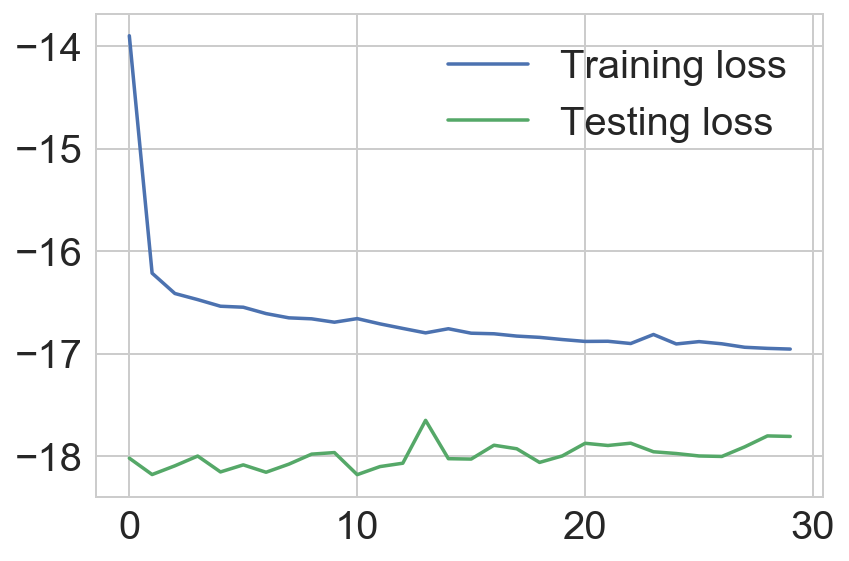

In [150]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()